In [4]:
sequences = []
fasta = open("sequences.fasta")
location = ""
sequence = ""
first = True
strains = 40
already_seen = {}
skip = 500
for l in fasta.readlines():
    if l[0] == '>':
        if (skip > 0):
            skip -= 1
            continue
        if (first):
            first = False
        else:
            if (location == "Wuhan-Hu-1"):
                sequences.append([location, sequence])
                already_seen[location] = True
            else:
                ls = location.split('/')
                province = ""
                if (len(ls) > 1):
                    for ll in ls[1]:
                        if ll.isalpha():
                            province+=ll
                        else:
                            break
                loc_ex = ls[0] + '/'+province
                if (loc_ex not in already_seen):
                    sequences.append([loc_ex, sequence])
                    already_seen[loc_ex] = True
                    strains -= 1
                    if (strains <= 0):
                        break
        sequence = ""
        if l[:10] == ">NC_045512":
            location = "Wuhan-Hu-1"
        else:
            tag = '/'.join(l.split('|')[1].split('/')[1:])
            location = tag.split('human/')[-1]
            location = '/'.join(location.split("/")[:-1])
    else:
        sequence += l.strip('\n')

In [5]:
for s in sequences:
    print(s[0])

USA/VA
AUS/VIC
IND/GBRC
USA/NY
USA/WA
USA/CA
USA/UT
Guangzhou/IQTC
USA/LA
THA/SI
IRN/HGRC
UZB/UZB
USA/MI
IND/nimh
SRB/KV
HKG/HKU
KAZ/NCB
IND/Assam
USA/WI
DEU/HH
USA/UF
feline/USA
canine/HKG
HKG.85_VM20002868/
HKG/
HKG/case
USA/PR
CHN/HN
USA/UNKNOWN
USA/CT
USA/ID
USA/OR
IND/OUMRK
IND/GMCKN
IND/GMCTC
CHN/MAS
CHN/JS
DEU/NRW
CHN/YN
mink/NLD


In [6]:
#fasta_short = open("sequences_short.fasta", "w")
max_len = max([len(s[1]) for s in sequences])
for i, s in enumerate(sequences):
    #fasta_short.write(s[0]+'\n')
    padding = "-"*(max_len - len(s[1]))
    #fasta_short.write(s[1]+padding+'\n')
    sequences[i][1] = s[1]+padding

In [7]:
from Bio.Alphabet import generic_dna
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
align = MultipleSeqAlignment([SeqRecord(Seq(s[1], generic_dna), id=s[0]) for s in sequences],
                           annotations={"tool": "demo"})

In [8]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(align)
#print(dm)

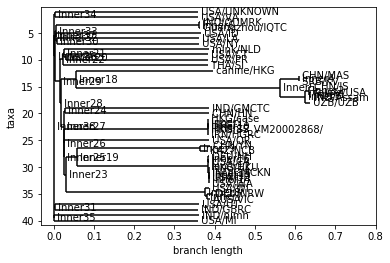

In [9]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo import draw
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)
draw(tree)

In [10]:
import geocoder
g = g = geocoder.arcgis('AUS')
print(g.latlng)

[-25.70993156999998, 134.48403119800003]


In [12]:
import folium
my_map = folium.Map()
locations = []
for s in sequences:
    loc_name = s[0]
    location = geocoder.arcgis(loc_name).latlng
    if (location is None):
        loc_name = loc_name.split('/')[0]
        location = geocoder.osm(loc_name)
    print(loc_name, ": ", location)
    locations.append(location)
    folium.Marker(location, popup=s[0]).add_to(my_map)
my_map

USA/VA :  [37.51282050400005, -78.69794871299996]
AUS/VIC :  [-36.84822897999993, 144.29954416900011]
IND/GBRC :  [26.186860000000024, 91.75788000000006]
USA/NY :  [40.71455000000003, -74.00713999999994]
USA/WA :  [47.41125184300006, -120.55626318699996]
USA/CA :  [36.37410569300005, -119.27022999999997]
USA/UT :  [39.32372519300003, -111.67824839099995]
Guangzhou/IQTC :  [23.116670000000056, 113.25000000000011]
USA/LA :  [30.18584616700008, -91.42641999999995]
THA/SI :  [14.62432091418674, 104.45636313326116]
IRN/HGRC :  [46.57134000000008, 23.785780000000045]
UZB/UZB :  [41.58134563700003, 63.42188301400006]
USA/MI :  [44.12519983400006, -84.19669749999997]
IND/nimh :  [19.038310000000024, 73.05888000000004]
SRB/KV :  [44.02936463900005, 20.804550522000056]
HKG/HKU :  [22.278839963356308, 114.16545997446485]
KAZ/NCB :  [48.18310616400004, 67.19504548200007]
IND/Assam :  [26.326143585000068, 92.83015209500007]
USA/WI :  [44.64483336700005, -89.73918542399997]
DEU/HH :  [53.55375000000

In [24]:
my_map = folium.Map()
cull_percent = 0.993
color_scale = ['red', 'lightred', 'pink', 'green', 'blue', "black"]
for i in range(len(locations)):
    path = tree.get_path(sequences[i][0])
    path_len = sum([p.branch_length for p in path])
    path_len = int((path_len - 0.35) * 130)
    path_len = min(path_len, len(color_scale) - 1)
    print(sequences[i][0], path_len)
    folium.Marker(locations[i], popup=sequences[i][0],
                 icon=folium.Icon(color=color_scale[path_len])).add_to(my_map)
    for j in range(i+1, len(locations)):
        if (dm[i][j] > cull_percent):
            folium.PolyLine([locations[i], locations[j]], weight = (dm[i][j] - cull_percent)*500).add_to(my_map)
my_map

USA/VA 1
AUS/VIC 5
IND/GBRC 0
USA/NY 1
USA/WA 4
USA/CA 4
USA/UT 1
Guangzhou/IQTC 1
USA/LA 1
THA/SI 4
IRN/HGRC 4
UZB/UZB 5
USA/MI 0
IND/nimh 1
SRB/KV 5
HKG/HKU 4
KAZ/NCB 3
IND/Assam 5
USA/WI 4
DEU/HH 4
USA/UF 4
feline/USA 5
canine/HKG 5
HKG.85_VM20002868/ 4
HKG/ 4
HKG/case 4
USA/PR 4
CHN/HN 4
USA/UNKNOWN 1
USA/CT 4
USA/ID 1
USA/OR 4
IND/OUMRK 1
IND/GMCKN 4
IND/GMCTC 4
CHN/MAS 5
CHN/JS 5
DEU/NRW 5
CHN/YN 5
mink/NLD 4


In [72]:
import numpy as np

my_map = folium.Map()
cull_percent = 0.993
color_scale = ['darkred', 'red', 'lightred', 'orange', 'pink', 'lightgreen', 'green', 
               'darkgreen', "lightblue", 'blue', 'cadetblue', "darkblue", "purple", 'darkpurple', "black"]
taxa = {sequences[i][0]:(np.array(locations[i], np.float32), [], -1) for i in range(len(locations))}
def add_taxa(t, depth):
    if (t.name in taxa):
        return taxa[t.name][0]
    loc = np.array([0,0], np.float32)
    child_count = 0
    descendants = []
    for descendant in t:
        loc += add_taxa(descendant, depth-1)
        child_count += 1
        descendants.append(descendant.name)
    loc = loc /child_count
    taxa[t.name] = (loc, descendants, depth)
    return loc
    
add_taxa(tree.root, len(color_scale) - 2)
    
for name,data in taxa.items():
    location, descendants, depth = data
    print(depth, color_scale[depth])
    folium.Marker(location, popup=name,
                 icon=folium.Icon(color=color_scale[depth])).add_to(my_map)
    for d in descendants:
        folium.PolyLine([location, taxa[d][0]], weight = 1).add_to(my_map)
my_map

-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
-1 black
11 darkblue
9 blue
8 lightblue
9 blue
10 cadetblue
7 darkgreen
8 lightblue
9 blue
6 green
4 pink
5 lightgreen
6 green
7 darkgreen
8 lightblue
7 darkgreen
4 pink
5 lightgreen
6 green
3 orange
2 lightred
0 darkred
1 red
2 lightred
3 orange
4 pink
3 orange
4 pink
5 lightgreen
6 green
7 darkgreen
8 lightblue
9 blue
10 cadetblue
11 darkblue
12 purple
12 purple
12 purple
13 darkpurple


In [30]:
tree.get_path(sequences[0][0])

[Clade(branch_length=0.001238525194744447, name='Inner37'),
 Clade(branch_length=0.0025641692859160875, name='Inner34'),
 Clade(branch_length=0.3547239729590814, name='USA/VA')]

In [32]:
sequences[0][1][:10]

'CCAACTTTCG'

In [34]:
{i:True for i in range(10)}.items()

dict_items([(0, True), (1, True), (2, True), (3, True), (4, True), (5, True), (6, True), (7, True), (8, True), (9, True)])

In [35]:
tree.root

Clade(branch_length=0, name='Inner38')

In [39]:
for c in tree.root:
    print(c)

Inner37
Inner31
Inner35
